<a href="https://colab.research.google.com/github/wasp33/ximen0703/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from urllib.request import urlretrieve
url="https://github.com/Elwing-Chou/ximen0703/raw/main/titanic/test.csv"
urlretrieve(url,"test.csv")
url="https://github.com/Elwing-Chou/ximen0703/raw/main/titanic/train.csv"
urlretrieve(url,"train.csv")

('train.csv', <http.client.HTTPMessage at 0x79c1594ccfd0>)

處理前先分類
1. 類別型 Pclass,Name(MID),Sex,Cabin,Embarked
2. 數值型 Age,Sibsp,Parch,ticket(count), Fare
類別最可能: 最常出現的值
數值最可能:

偏度定義; $ \frac{1}{n} \sum_{i=1}^n (P_i-avg)^3 $

GDP => 平均

薪資 => 中位數

成績 => 中位數

In [85]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
datas_predict = pd.read_csv("test.csv",encoding="utf-8")
#data = pd.DataFrame(datas)

In [86]:
datas_total=pd.concat([datas,data_predict],axis=0)
#data_total
datas_total=datas_total.drop(["PassengerId","Survived"], axis=1)
#datas_total

isna() 檢查是否為空值
isna().sum() 總數量
[]代入[]陣列

In [87]:
# 一維: Series
s=datas_total.isna().sum()
f = s>0
s[f].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [88]:
d = pd.DataFrame([
    [1,2],
    [3,4],
    [5,6]])
d[[True,False,True]]

,0,1
0,1,2
2,5,6


In [89]:
#value_counts()
most=datas_total["Embarked"].value_counts().idxmax()
datas_total["Embarked"] = datas_total["Embarked"].fillna(most)

In [90]:
# 語法demo:
# list型態 [0]操作
# function型態 (4.2)操作
b = int
b(4.2)

4

In [91]:
# pandas demo:
# Series.apply(func型態)
def square(n):
    return n * n
s = pd.Series([1, 2, 3, 4])
s.apply(square)

0     1
1     4
2     9
3    16
dtype: int64

In [92]:
#
def name(n):
    return n.split(",")[-1].split(".")[0].strip()
datas_total["Name"]=datas_total["Name"].apply(name)

In [93]:
counts = datas_total["Ticket"].value_counts()
def ticket(t):
    return counts[t]
datas_total["Ticket"] = datas_total["Ticket"].apply(ticket)

In [94]:
def cabin(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
datas_total["Cabin"] = datas_total["Cabin"].apply(cabin)
#datas_total

In [95]:
#補數值中位數
med = datas_total.median().drop("Pclass")
datas_total = datas_total.fillna(med)
#再檢查一次空值有哪些
s=datas_total.isna().sum()
f = s>0
s[f].sort_values(ascending=False)

<ipython-input-95-3b3b4abae6c8>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = datas_total.median().drop("Pclass")


Cabin    1014
dtype: int64

In [96]:
counts = datas_total["Name"].value_counts()
reserved = counts[counts > 50].index
def name2(mid):
    if mid in reserved:
        return mid
    else:
        return None
datas_total["Name"]=datas_total['Name'].apply(name2)
#data_total["Name"]

In [97]:
pd.set_option('display.max_columns',500)
datas_total = pd.get_dummies(datas_total)
datas_total = pd.get_dummies(datas_total,columns=["Pclass"])
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
414,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
416,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [98]:
#family = SibSp + Parch
datas_total['Family'] = datas_total["SibSp"] + datas_total["Parch"]
datas_total['Family'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family, dtype: int64

In [99]:
# demo concat
d1 = pd.DataFrame([[1, 2]])
d2 = pd.DataFrame([[3, 4]])
pd.concat([d1, d2], axis=0)

,0,1
0,1,2
0,3,4


In [100]:
# demo: loc/iloc

*注意: 演算法中的距離差別太大時, 準確性低

fit -> 一次性找出最小最大(只找一次)

transform -> 會做很多次`

In [101]:
#not scaled
x = datas_total.iloc[:len(datas)]
y = datas["Survived"]
x_predict = datas_total.iloc[len(datas):]

In [102]:
#scaled
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_total_scaled = pd.DataFrame(scaler.fit_transform(datas_total),
                  columns=datas_total.columns)
x_scaled = datas_total_scaled.iloc[:len(datas)]
x_predict_scaled = datas_total_scaled.iloc[len(datas):]

x_scaled

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.336089,0.000,0.000000,0.0,0.025374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
887,0.235876,0.000,0.000000,0.0,0.058556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
888,0.348616,0.125,0.222222,0.3,0.045771,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.3
889,0.323563,0.000,0.000000,0.0,0.058556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


KNeighborsClassifier

GridSearchCV 每組參數都會做交叉驗證

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(3, 30)
}
search = GridSearchCV(clf, params, n_jobs=-1, cv=10)
search.fit(x_scaled, y)
print(search.best_params_)
print(search.best_score_)


{'n_neighbors': 7}
0.832796504369538


In [104]:
# 其實用7就結束了, 但如果是比賽 那只能靠點運氣
# 靠運氣的話選11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled, y)
pre = clf.predict(x_predict_scaled)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)

決策樹組合的方式 Ensemble

Bagging

boosting

RamdomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
params = {
    "n_estimators":range(21, 100, 2),
    "max_depth":range(2, 10)
}
search = GridSearchCV(clf, params, n_jobs=-1, cv=10)
search.fit(x, y)
print(search.best_params_)
print(search.best_score_)

In [106]:
clf = RandomForestClassifier(max_depth=7, n_estimators=59)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)

[Text(0.5, 0.875, 'Sex_male <= 0.5\ngini = 0.464\nsamples = 551\nvalue = [565, 326]\nclass = Victim'),
 Text(0.25, 0.625, 'Pclass_1 <= 0.5\ngini = 0.373\nsamples = 182\nvalue = [71, 215]\nclass = Survivor'),
 Text(0.125, 0.375, 'Ticket <= 4.5\ngini = 0.448\nsamples = 125\nvalue = [68, 133]\nclass = Survivor'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Fare <= 34.056\ngini = 0.068\nsamples = 57\nvalue = [3, 82]\nclass = Survivor'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Age <= 13.0\ngini = 0.3\nsamples = 369\nvalue = [494, 111]\nclass = Victim'),
 Text(0.625, 0.375, 'Embarked_S <= 0.5\ngini = 0.491\nsamples = 26\nvalue = [22, 29]\nclass = Survivor'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pclass_3 <= 0.5\ngini = 0.252\nsamples = 343\nvalue = [472, 82]\nclass = Victim'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text

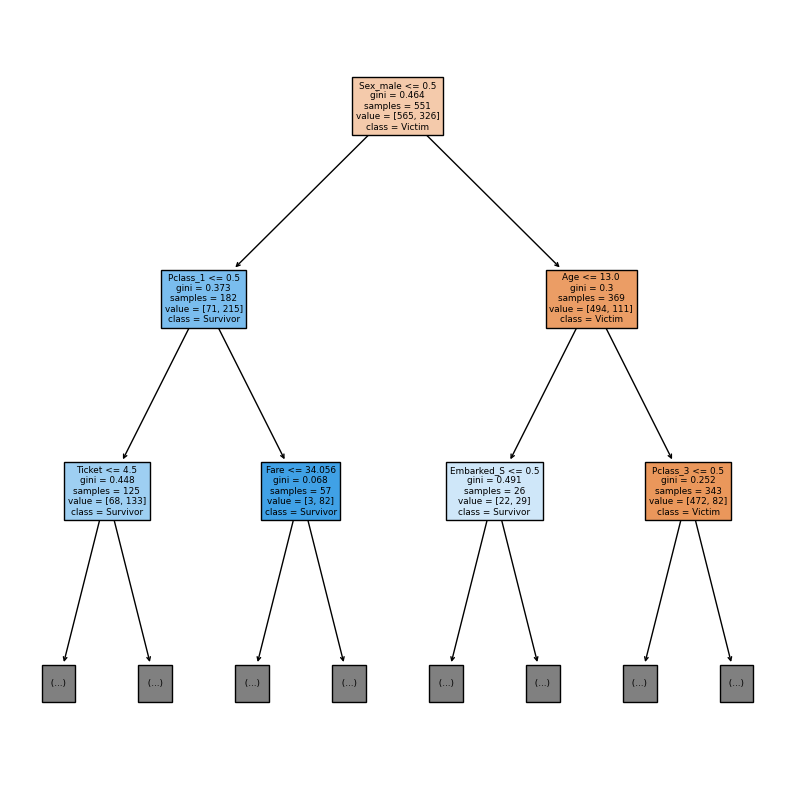

In [107]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
# 看你有幾棵[ ]
plot_tree(clf.estimators_[2],
     feature_names=x.columns,
     class_names=["Victim", "Survivor"],
     filled=True,
     max_depth=2)

In [108]:
pd.Series(clf.feature_importances_,
     index=x.columns).sort_values(ascending=False)

Sex_male       0.140000
Name_Mr        0.130947
Sex_female     0.125235
Fare           0.104992
Age            0.072699
Ticket         0.059288
Pclass_3       0.058596
Family         0.051206
Name_Miss      0.048438
Name_Mrs       0.043320
Pclass_1       0.032715
SibSp          0.024286
Parch          0.017886
Pclass_2       0.014800
Cabin_E        0.013903
Embarked_S     0.011650
Embarked_C     0.010706
Name_Master    0.010506
Embarked_Q     0.007301
Cabin_B        0.006831
Cabin_D        0.006352
Cabin_C        0.004498
Cabin_A        0.001465
Cabin_G        0.001455
Cabin_F        0.000828
Cabin_T        0.000099
dtype: float64

劃圖 最後才劃

title標題
axis:軸
label:軸的標籤
ticks:刻度
legend:圖例

<Axes: xlabel='Sex', ylabel='count'>

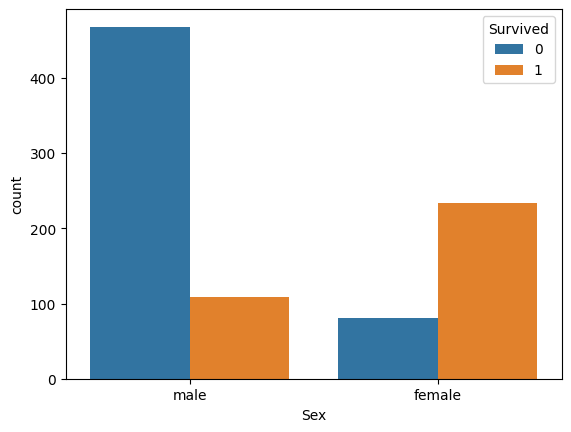

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=datas, x="Sex",hue="Survived")

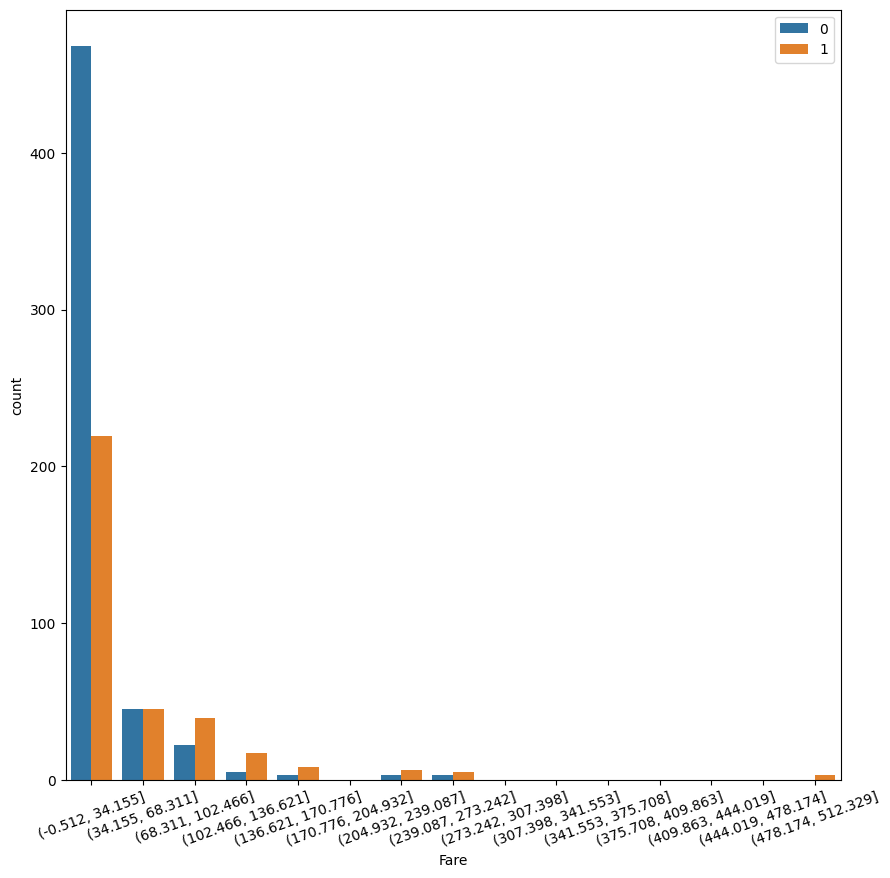

In [110]:
c=pd.cut(datas["Fare"],15)
plt.figure(figsize=(10,10))
sns.countplot(x=c,hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

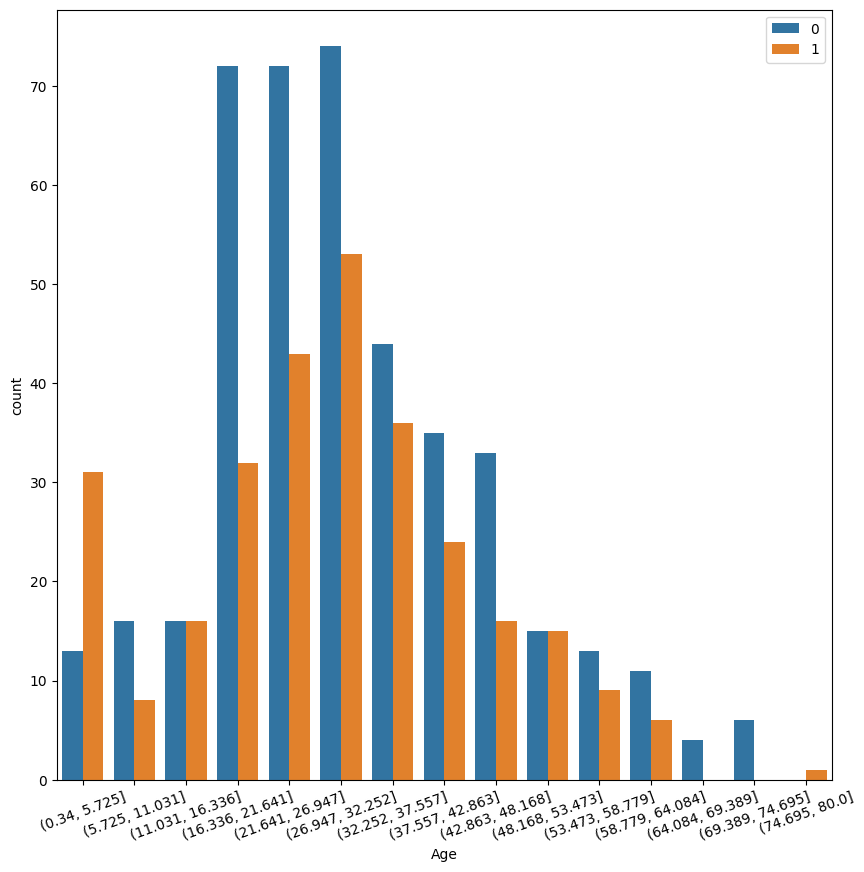

In [111]:
c=pd.cut(datas["Age"],15)
plt.figure(figsize=(10,10))
sns.countplot(x=c,hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")